# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

In [1]:
import cv2
import time
import numpy as np

img_path = 'data/lena.png'
img = cv2.imread(img_path)

## 上下左右翻轉圖片

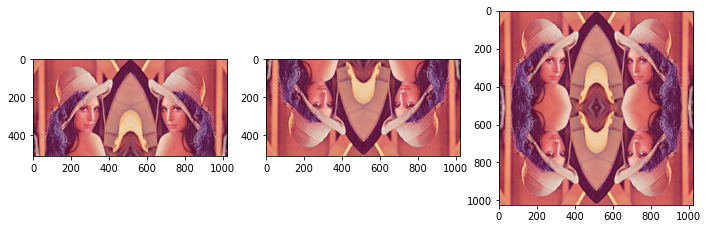

In [11]:
# 水平翻轉 (horizontal)
img_hflip = img[:, ::-1, :]

# 垂直翻轉 (vertical)
img_vflip = img[::-1, :, :]

# 水平 + 垂直翻轉
img_hvflip = img_hflip[::-1, :, :]

# 組合 + 顯示圖片
hflip = np.hstack((img, img_hflip))
vflip = np.hstack((img_vflip, img_hvflip))
img_flip = np.vstack((hflip, vflip))

def cv2plt(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

from matplotlib import pyplot as plt
f = plt.figure(figsize=(16, 6))

f.add_subplot(1, 4, 1)
plt.imshow(cv2plt(hflip))

f.add_subplot(1, 4, 2)
plt.imshow(cv2plt(vflip))

f.add_subplot(1, 4, 3)
plt.imshow(cv2plt(img_flip))

plt.show(block=True)

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

INTER_NEAREST zoom cost 0.0006330013275146484
INTER_CUBIC   zoom cost 0.0005276203155517578


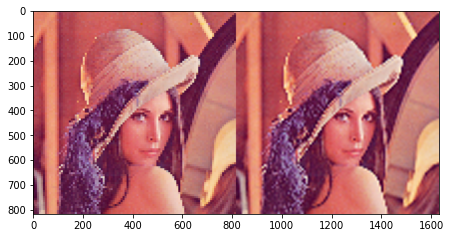

In [30]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC   zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片
img_zoom = np.hstack((img_area_scale, img_cubic_scale))

f = plt.figure(figsize=(16, 16))

f.add_subplot(1, 2, 1)
plt.imshow(cv2plt(img_zoom))

plt.show(block=True)

## 平移幾何轉換

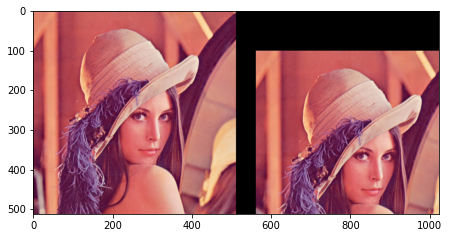

In [51]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M = np.array([[1, 0, 50],
             [0, 1, 100]], dtype = np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img))

f = plt.figure(figsize=(16, 16))

f.add_subplot(1, 2, 1)
plt.imshow(cv2plt(img_shift))

plt.show(block=True)